<a href="https://colab.research.google.com/github/diamond-nicholas/regression_model_with_keras/blob/main/regression_with_keras(A).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras

In [2]:
import pandas as pd
import numpy as np

In [3]:
concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8344335d10>,
      dtype=object)

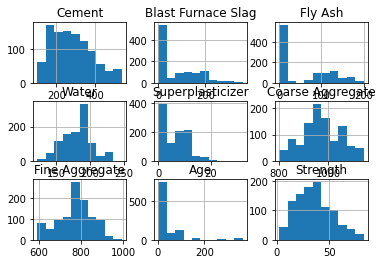

In [4]:
concrete_data.hist()

In [5]:
concrete_data.shape

(1030, 9)

In [6]:
concrete_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
concrete_data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [8]:
concrete_data_columns = concrete_data.columns

predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']] # all columns except Strength
target = concrete_data['Strength'] # Strength column

In [9]:
predictors.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [10]:
target.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

In [11]:
predictors_norm = (predictors - predictors.mean()) / predictors.std()
predictors_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


In [12]:
n_cols = predictors_norm.shape[1] # number of predictors
n_cols

8

In [13]:
from keras.models import Sequential
from keras.layers import Dense

Build Network

In [14]:
# define regression model
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model
   

In [15]:
from sklearn.model_selection import train_test_split


In [16]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, random_state=42)


Train and test the network


In [17]:
# build the model
model = regression_model()
model

In [19]:
# fit the model
model.fit(X_train, y_train, epochs=50, verbose=1)

Epoch 1/50
23/23 [==============================] - 0s 2ms/step - loss: 1091.8816
Epoch 2/50
23/23 [==============================] - 0s 2ms/step - loss: 1053.3804
Epoch 3/50
23/23 [==============================] - 0s 3ms/step - loss: 1014.3867
Epoch 4/50
23/23 [==============================] - 0s 2ms/step - loss: 979.9718
Epoch 5/50
23/23 [==============================] - 0s 3ms/step - loss: 945.7449
Epoch 6/50
23/23 [==============================] - 0s 3ms/step - loss: 914.2365
Epoch 7/50
23/23 [==============================] - 0s 3ms/step - loss: 882.4109
Epoch 8/50
23/23 [==============================] - 0s 4ms/step - loss: 853.5357
Epoch 9/50
23/23 [==============================] - 0s 3ms/step - loss: 824.3272
Epoch 10/50
23/23 [==============================] - 0s 2ms/step - loss: 798.2564
Epoch 11/50
23/23 [==============================] - 0s 3ms/step - loss: 772.8501
Epoch 12/50
23/23 [==============================] - 0s 3ms/step - loss: 748.1316
Epoch 13/50
23/23 [===

Evaluate the model on the test data

In [20]:
loss_val = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
loss_val

10/10 [==============================] - 0s 4ms/step - loss: 233.1161


233.11614990234375

MSE

In [21]:
from sklearn.metrics import mean_squared_error


In [22]:
mean_square_error = mean_squared_error(y_test, y_pred)
mean = np.mean(mean_square_error)
standard_deviation = np.std(mean_square_error)
print(mean, standard_deviation)

233.1161537030255 0.0


create a list of 50 MSE

In [23]:
total_mean_squared_errors = 50
epochs = 50
mean_squared_errors = []
for i in range(0, total_mean_squared_errors):
    X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, random_state=i)
    model.fit(X_train, y_train, epochs=epochs, verbose=0)
    MSE = model.evaluate(X_test, y_test, verbose=0)
    print("MSE "+str(i+1)+": "+str(MSE))
    y_pred = model.predict(X_test)
    mean_square_error = mean_squared_error(y_test, y_pred)
    mean_squared_errors.append(mean_square_error)

mean_squared_errors = np.array(mean_squared_errors)
mean = np.mean(mean_squared_errors)
standard_deviation = np.std(mean_squared_errors)

print('\n')
print("Below is the mean and standard deviation of " +str(total_mean_squared_errors) + " mean squared errors without normalized data. Total number of epochs for each training is: " +str(epochs) + "\n")
print("Mean: "+str(mean))
print("Standard Deviation: "+str(standard_deviation))

MSE 1: 113.9127197265625
MSE 2: 121.96851348876953
MSE 3: 109.1612319946289
MSE 4: 121.18617248535156
MSE 5: 133.5401153564453
MSE 6: 107.40919494628906
MSE 7: 130.63197326660156
MSE 8: 98.5664291381836
MSE 9: 121.01318359375
MSE 10: 117.9836196899414
MSE 11: 103.17815399169922
MSE 12: 99.97396850585938
MSE 13: 115.92391967773438
MSE 14: 115.81108093261719
MSE 15: 108.31063842773438
MSE 16: 108.02122497558594
MSE 17: 104.56907653808594
MSE 18: 96.24969482421875
MSE 19: 96.30765533447266
MSE 20: 132.89547729492188
MSE 21: 106.90584564208984
MSE 22: 102.8387451171875
MSE 23: 112.91688537597656
MSE 24: 103.22444915771484
MSE 25: 109.0597915649414
MSE 26: 102.34640502929688
MSE 27: 123.7017593383789
MSE 28: 108.40369415283203
MSE 29: 110.02291870117188
MSE 30: 112.6882095336914
MSE 31: 131.52244567871094
MSE 32: 106.27422332763672
MSE 33: 104.88213348388672
MSE 34: 109.77532196044922
MSE 35: 116.13639068603516
MSE 36: 108.36185455322266
MSE 37: 81.50552368164062
MSE 38: 71.40460968017578
M